<a href="https://colab.research.google.com/github/Gaukhar-ai/Gaukhar/blob/master/ttest_marble_race.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install nb_black

In [2]:
#%reload_ext nb_black #to beautify

In [3]:
import pandas as pd
import numpy as np

#for ttest
from scipy import stats

#for relatively easy plots
#!pip install plotly
import plotly.graph_objects as go
import plotly.express as px

#for typical plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
'''#Helper functions for generating race data

def _gen_player_data(color, name = "", y = 0, n_steps=20):
#generate a random race time and split it out over time steps for plotting
  s = 0.3
  if color =='#4C78A8':
    s = 4.0

    #Generate random race times
    finish_time = np.random.normal(n_steps * 0.8, s)

    #Find x position for each frame of race
    rate = 1 / finish_time
    step = finish_time / n_steps
    time_steps = np.arange(n_steps + 1)
    x_pos = time_steps*rate

    #store all plotting info for plotly
    race_df = pd.DataFrame(
        {
         'time': time_steps,
         'x': x_pos,
         'y': y,
         'color': color,
         'name': name, 
         'finish_time': finish_time,
         }
    )

    #add a little jitter to be less boring:)
    excitement = np.ones_like(x_pos) * 0.01
    excitement[: len(excitement) // 2] *= -1
    np.random.shuffle(excitement)
    race_df['x'] += excitement
    race_df.loc[0, 'x'] = 0

    return race_df

def _gen_race_data(players, colors = px.colors.qualitative.T10):
  "simulate a marble race between players"
  race_dfs = []
  name_colors = zip(players, colors)
  for i, (name, color) in enumerate(name_colors):
    race_df = _gen_player_data(color, name, i * 0.1)
    race_dfs.append(race_df)

  return pd.concat(race_dfs).reset_index(drop=True)

def marble_race(players, seed = None):
  'simulate a marble race'
  if isinstance(seed, int):
    np.random.seed(seed)
  race_df = _gen_race_data(players)

  return(
      race_df[['color', 'name', 'finish_time']]
      .drop_duplicates()
      .reset_index(drop = True)
  )
'''

'#Helper functions for generating race data\n\ndef _gen_player_data(color, name = "", y = 0, n_steps=20):\n#generate a random race time and split it out over time steps for plotting\n  s = 0.3\n  if color ==\'#4C78A8\':\n    s = 4.0\n\n    #Generate random race times\n    finish_time = np.random.normal(n_steps * 0.8, s)\n\n    #Find x position for each frame of race\n    rate = 1 / finish_time\n    step = finish_time / n_steps\n    time_steps = np.arange(n_steps + 1)\n    x_pos = time_steps*rate\n\n    #store all plotting info for plotly\n    race_df = pd.DataFrame(\n        {\n         \'time\': time_steps,\n         \'x\': x_pos,\n         \'y\': y,\n         \'color\': color,\n         \'name\': name, \n         \'finish_time\': finish_time,\n         }\n    )\n\n    #add a little jitter to be less boring:)\n    excitement = np.ones_like(x_pos) * 0.01\n    excitement[: len(excitement) // 2] *= -1\n    np.random.shuffle(excitement)\n    race_df[\'x\'] += excitement\n    race_df.loc[0

In [5]:
# Helpers for generating race data
def _gen_player_data(color, name="", y=0, n_steps=20):
    """Generate a random race time and split it out over time steps for plotting"""
    s = 0.3
    if color == "#4C78A8":
        s = 4.0

    # Generate random race times
    finish_time = np.random.normal(n_steps * 0.8, s)

    # Find x position for each frame of race
    rate = 1 / finish_time
    step = finish_time / n_steps
    time_steps = np.arange(n_steps + 1)
    x_pos = time_steps * rate

    # Store all plotting info for plotly
    race_df = pd.DataFrame(
        {
            "time": time_steps,
            "x": x_pos,
            "y": y,
            "color": color,
            "name": name,
            "finish_time": finish_time,
        }
    )

    # Add a little jitter to be less boring
    excitement = np.ones_like(x_pos) * 0.01
    excitement[: len(excitement) // 2] *= -1
    np.random.shuffle(excitement)
    race_df["x"] += excitement
    race_df.loc[0, "x"] = 0
    return race_df


def _gen_race_data(players, colors=px.colors.qualitative.T10):
    """'Simulate' a marble race between players"""
    race_dfs = []
    name_colors = zip(players, colors)
    for i, (name, color) in enumerate(name_colors):
        race_df = _gen_player_data(color, name, i * 0.1)
        race_dfs.append(race_df)

    return pd.concat(race_dfs).reset_index(drop=True)


def marble_race(players, seed=None):
    """'Simulate' a marble race"""
    if isinstance(seed, int):
        np.random.seed(seed)
    race_df = _gen_race_data(players)

    return (
        race_df[["color", "name", "finish_time"]]
        .drop_duplicates()
        .reset_index(drop=True)
    )

In [6]:
def plot_marble_race(players, seed=None):
  #simulate and plot a marble race
  if isinstance(seed, int):
    np.random.seed(seed)
  race_df = _gen_race_data(players)

  color_df = race_df[['color', 'name']].drop_duplicates()
  color_discrete_map = {}
  for __, row in color_df.iterrows():
      color_discrete_map[row['name']] = row['color']

  fig = px.scatter(
      data_frame=race_df,
      x = 'x',
      y = 'y',
      color = 'name',
      text = 'name',
      animation_frame = 'time',
      title = 'marble racing',
      color_discrete_map = color_discrete_map,
  )

  fig.update_traces(marker = {'size': 20})
  fig.update_layout(showlegend=False)

  fig.add_trace(
      go.Scatter(x = [1, 1], y = [-300, 300], mode = 'lines', line ={'color': 'black'},)
  )
  fig.update_xaxes(
      {'range': [-0.1, 1.1], 'showgrid': False, 'zeroline': False, 'visible': False,}
  )
  fig.update_yaxes(
      {'range': [-0.1, 1.1], 'showgrid': False, 'zeroline': False, 'visible': False,}
  )
  return fig

In [7]:
racers = [
          'Mom',
          'Dad',
          'Brother',
          'I',
          'Asemtai',
          'Baitemir-kyzy',
          'Tokash',
          'Cookie',
          'Bota',
          'Azentai',
          'Sia',
          'Eminem',
]

In [8]:
#claim: do you believe that blue marble is faster? why? why not?
#challenging the status quo

RACE I

In [9]:
plot_marble_race(racers, 90)


In [10]:
results = marble_race(racers, 90)
results.sort_values('finish_time').head()

,color,name,finish_time
0,#4C78A8,Mom,15.102053
2,#E45756,Brother,15.628858
4,#54A24B,Asemtai,15.809918
9,#BAB0AC,Azentai,15.853449
3,#72B7B2,I,15.925433


RACE II

In [11]:
plot_marble_race(racers, 55)

In [12]:
results = marble_race(racers, 55)
results.sort_values('finish_time').head()

,color,name,finish_time
0,#4C78A8,Mom,9.505076
4,#54A24B,Asemtai,15.340923
6,#B279A2,Tokash,15.795131
3,#72B7B2,I,15.891577
1,#F58518,Dad,15.969465


RACE III

In [13]:
plot_marble_race(racers, 89402)

In [14]:
results  = marble_race(racers, 89402)
results.sort_values('finish_time').head()

,color,name,finish_time
8,#9D755D,Bota,15.657295
9,#BAB0AC,Azentai,15.696436
3,#72B7B2,I,15.803484
7,#FF9DA6,Cookie,15.887054
6,#B279A2,Tokash,16.019908


On Average does blue has a faster time than other marbles? 

ttest math:

t = signal / noise

If we keep $noise$ the same and the $signal$ gets larger, what happens to the value of $t$? Does $t$ get larger or smaller as the $signal$ gets large? - 
the value of t gets larger if the signal gets larger.

If we keep $signal$ the same and the $noise$ gets larger, what happens to the value of $t$? Does $t$ get larger or smaller as the $noise$ gets large?
- the value of t will get lower

n = sample size(how much evidence)
s = sample standard deviation(how consistent)


In [16]:
#use the marble_race function to run 100 races and combine these dataframes into 1 big DF

In [15]:
race_dfs = []
for i in range(100):
  race_df = marble_race(racers)
  race_dfs.append(race_df)

marble_data = pd.concat(race_dfs)

In [17]:
marble_data

,color,name,finish_time
0,#4C78A8,Mom,15.530650
1,#F58518,Dad,16.256593
2,#E45756,Brother,15.995818
3,#72B7B2,I,15.825432
4,#54A24B,Asemtai,16.204945
...,...,...,...
5,#EECA3B,Baitemir-kyzy,16.517249
6,#B279A2,Tokash,16.138078
7,#FF9DA6,Cookie,16.209436
8,#9D755D,Bota,16.504088


create a column in the DF that indicates what group the marble belongs to(i.e. blue vs not blue)
create a boxplot or violinplot that compares these 2 groups
what r your thougts at this point? expect a difference?

In [20]:
marble_data['color']

0    #4C78A8
1    #F58518
2    #E45756
3    #72B7B2
4    #54A24B
      ...   
5    #EECA3B
6    #B279A2
7    #FF9DA6
8    #9D755D
9    #BAB0AC
Name: color, Length: 1000, dtype: object

In [22]:
color_blue = '#4C78A8'
marble_data['is_blue'] = marble_data['color'] == color_blue
marble_data.head()

,color,name,finish_time,is_blue
0,#4C78A8,Mom,15.530650,True
1,#F58518,Dad,16.256593,False
2,#E45756,Brother,15.995818,False
3,#72B7B2,I,15.825432,False
4,#54A24B,Asemtai,16.204945,False


In [23]:
sns.violinplot?

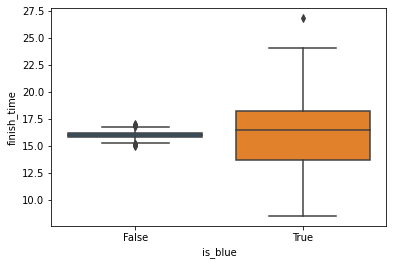

In [26]:
sns.boxplot(x="is_blue", y="finish_time", data=marble_data)
plt.show()

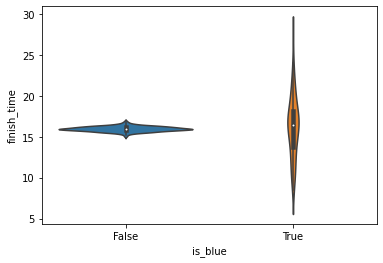

In [27]:
sns.violinplot(x="is_blue", y="finish_time", data=marble_data)
plt.show()
